In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [47]:
path = 'F:\DOCUMENTOS ALEJANDRO\MASTERMIND\Mastermind\DATA\GITHUB\Projects\Linear_regresion\Final_project\CarPrice_Assignment.csv'

df= pd.read_csv(path)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- 1	Car_ID	Unique id of each observation (Interger)
- 2	Symboling	Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical)
- 3	carCompany	Name of car company (Categorical)
- 4	fueltype	Car fuel type i.e gas or diesel (Categorical)
- 5	aspiration	Aspiration used in a car (Categorical) (Std o Turbo)
- 6	doornumber	Number of doors in a car (Categorical). Puertas
- 7	carbody	body of car (Categorical). (convertible, sedan, wagon …)
- 8	drivewheel	type of drive wheel (Categorical). (hidráulica, manual, )
- 9	enginelocation	Location of car engine (Categorical). Lugar del motor
- 10 wheelbase	Weelbase of car (Numeric). Distancia de ejes en pulgadas.
- 11 carlength	Length of car (Numeric). Longitud
- 12 carwidth	Width of car (Numeric). Amplitud
- 13 carheight	height of car (Numeric). Altura
- 14 curbweight	The weight of a car without occupants or baggage. (Numeric). Peso del auto
- 15 enginetype	Type of engine. (Categorical). Tipo de motor
- 16 cylindernumber	cylinder placed in the car (Categorical). Cilindraje
- 17 enginesize	Size of car (Numeric). Tamaño del carro en …
- 18 fuelsystem	Fuel system of car (Categorical)
- 19 boreratio	Boreratio of car (Numeric). Eficiencia de motor
- 20 troke	Stroke or volume inside the engine (Numeric). Pistones, tiempos, combustión
- 21 compressionratio	compression ratio of car (Numeric). Comprensión o medición de presión en motor
- 22 horsepower	Horsepower (Numeric). Poder del carro
- 23 peakrpm	car peak rpm (Numeric). Picos de revoluciones por minuto
- 24 citympg	Mileage in city (Numeric). Consumo de gasolina
- 25 highwaympg	Mileage on highway (Numeric). Consumo de gasolina
- 26 price

# 1. Data analysis and manipulation

In [49]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [50]:
df.drop(["car_ID", "symboling", "drivewheel", "wheelbase"], axis=1, inplace=True)

In [51]:
df.columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'enginelocation', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [52]:
df.head()

,CarName,fueltype,aspiration,doornumber,carbody,enginelocation,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,gas,std,two,convertible,front,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero stelvio,gas,std,two,convertible,front,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,front,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi 100 ls,gas,std,four,sedan,front,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi 100ls,gas,std,four,sedan,front,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


- Voy a extraer el nombre de la marca y definirlo en una nueva columna. Quiero hacer mis predicciones en función de la marca y las características del coche, por lo que el modelo no lo voy a tener en cuenta para resolver este proyecto.

In [53]:
df['CarName'] = df['CarName'].str.split().str[0]

In [54]:
df.rename(columns = {'CarName':'brand'}, inplace = True)

- Comprobamos si hay algun NaN

In [55]:
df.isnull().any()

brand               False
fueltype            False
aspiration          False
doornumber          False
carbody             False
enginelocation      False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

## Encoding de los registros del tipo string

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   carlength         205 non-null    float64
 7   carwidth          205 non-null    float64
 8   carheight         205 non-null    float64
 9   curbweight        205 non-null    int64  
 10  enginetype        205 non-null    object 
 11  cylindernumber    205 non-null    object 
 12  enginesize        205 non-null    int64  
 13  fuelsystem        205 non-null    object 
 14  boreratio         205 non-null    float64
 15  stroke            205 non-null    float64
 16  compressionratio  205 non-null    float64
 1

In [57]:
le = LabelEncoder()

In [58]:
df['brand'] = le.fit_transform(df['brand'])
df['fueltype'] = le.fit_transform(df['fueltype']) 
df['aspiration'] = le.fit_transform(df['aspiration']) 
df['doornumber'] = le.fit_transform(df['doornumber']) 
df['carbody'] = le.fit_transform(df['carbody']) 
df['enginelocation'] = le.fit_transform(df['enginelocation']) 
df['enginetype'] = le.fit_transform(df['enginetype'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber']) 
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])

In [59]:
#columns_to_encode = ['brand', 'fueltype', 'aspiration', 'doornumber', 'carbody', 
#                     'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

#for column in columns_to_encode:
    #df[column] = le.fit_transform(df[column])

In [60]:
df.head()

,brand,fueltype,aspiration,doornumber,carbody,enginelocation,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,1,0,1,0,0,168.8,64.1,48.8,2548,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,1,0,1,0,0,168.8,64.1,48.8,2548,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,0,171.2,65.5,52.4,2823,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,0,176.6,66.2,54.3,2337,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,176.6,66.4,54.3,2824,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


## Scaling de los registros de tipo numérico

In [61]:
df.columns

Index(['brand', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'enginelocation', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [62]:
s_sc = StandardScaler()

df[['carlength', 'carwidth', 'carheight', 'curbweight', 
    'cylindernumber', 'enginesize', 'boreratio','stroke', 
    'compressionratio', 'horsepower', 'peakrpm', 'citympg',
    'highwaympg']] =  s_sc.fit_transform(df[['carlength', 'carwidth', 'carheight', 'curbweight', 
    'cylindernumber', 'enginesize', 'boreratio','stroke', 
    'compressionratio', 'horsepower', 'peakrpm', 'citympg',
    'highwaympg']])

In [63]:
df.sample(10)

,brand,fueltype,aspiration,doornumber,carbody,enginelocation,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
93,14,1,0,0,4,0,-0.312767,-0.984972,-0.092256,-1.023406,...,-0.719947,1,-0.665314,0.110556,-0.187398,-0.890221,0.157366,0.885740,0.909625,7349.0
161,22,1,0,0,2,0,-0.629655,-0.704593,-0.379429,-0.834730,...,-0.695874,1,-0.517266,-0.720563,-0.288349,-0.864871,-0.683286,0.426052,0.472920,8358.0
167,22,1,0,1,1,0,0.174754,-0.143836,-0.707626,-0.029968,...,0.459611,5,1.074252,0.781845,-0.212636,0.301233,-0.683286,-0.186865,-0.109354,8449.0
133,20,1,0,0,3,0,1.019791,0.276731,0.974387,0.268448,...,-0.142204,5,0.778156,-0.592699,-0.212636,0.149133,0.262448,-0.646553,-0.400490,12170.0
28,6,1,0,0,4,0,0.044749,-0.611134,2.492302,-0.039595,...,-0.118132,1,0.037915,0.653980,-0.414537,-0.408569,-0.262960,-0.186865,-0.109354,8921.0
116,15,0,1,0,3,0,1.027916,1.164596,1.220535,1.340821,...,0.604046,3,1.370348,0.845777,2.740164,-0.231119,-2.049347,0.426052,0.327351,17950.0
184,25,0,0,0,3,0,-0.190886,-0.190566,0.810288,-0.561342,...,-0.719947,3,-1.183483,0.462183,3.244916,-1.321172,-0.683286,1.805116,2.219739,7995.0
182,24,0,0,1,3,0,-0.190886,-0.190566,0.810288,-0.567118,...,-0.719947,3,-1.183483,0.462183,3.244916,-1.321172,-0.683286,1.805116,2.219739,7775.0
63,11,0,0,0,3,0,0.304760,0.276731,0.728239,-0.216719,...,-0.118132,3,0.222975,0.430217,3.169203,-1.016971,-0.998531,1.651887,1.637466,10795.0
46,8,1,0,1,2,0,-0.117758,-0.330755,-0.953775,0.343533,...,-0.190350,7,0.371023,-0.081241,-0.237874,-0.357869,-0.262960,-0.186865,-0.254922,11048.0


# 2. Explore

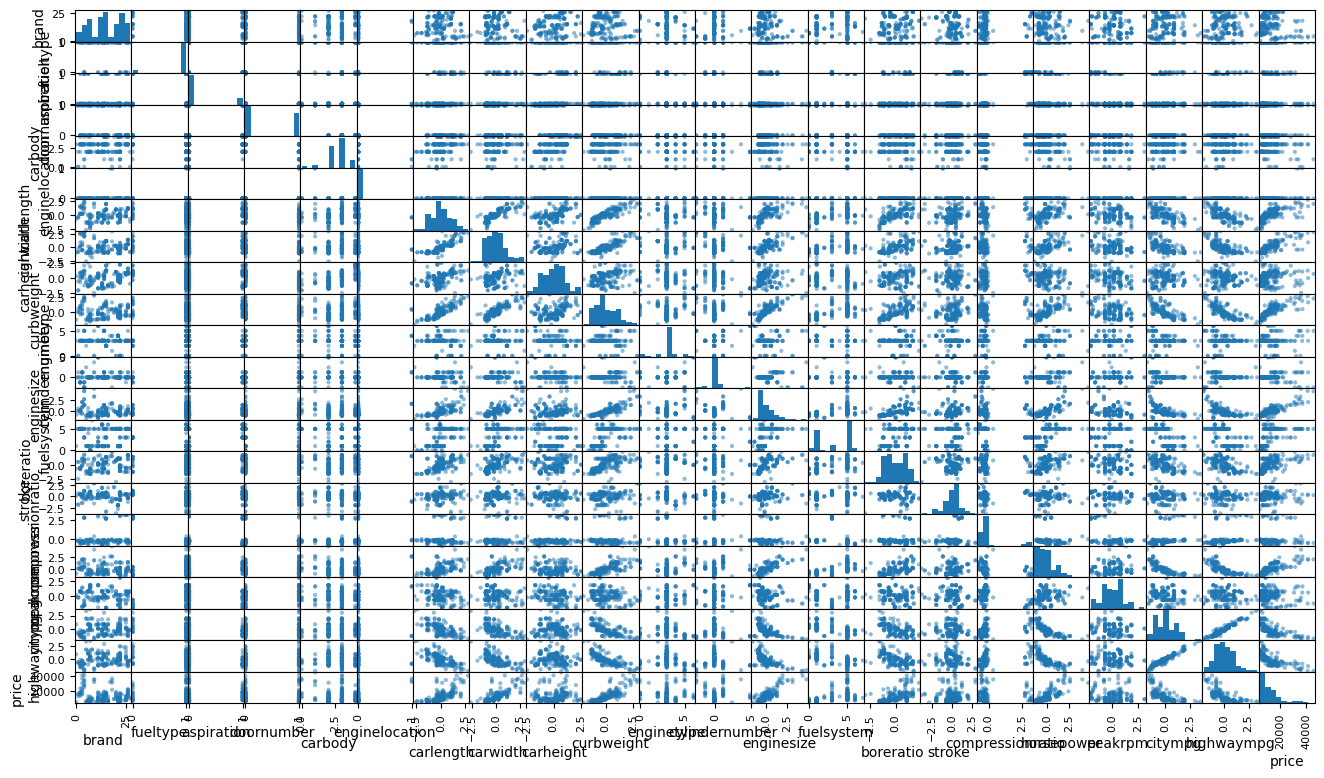

In [64]:
pd.plotting.scatter_matrix(df, figsize=(16, 9));

<Axes: >

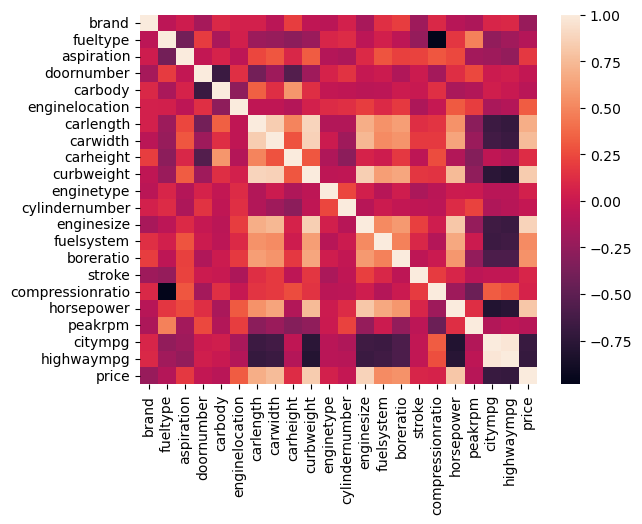

In [65]:
import matplotlib.pyplot as plt
import numpy as np

corr = df.corr()

sns.heatmap(corr)

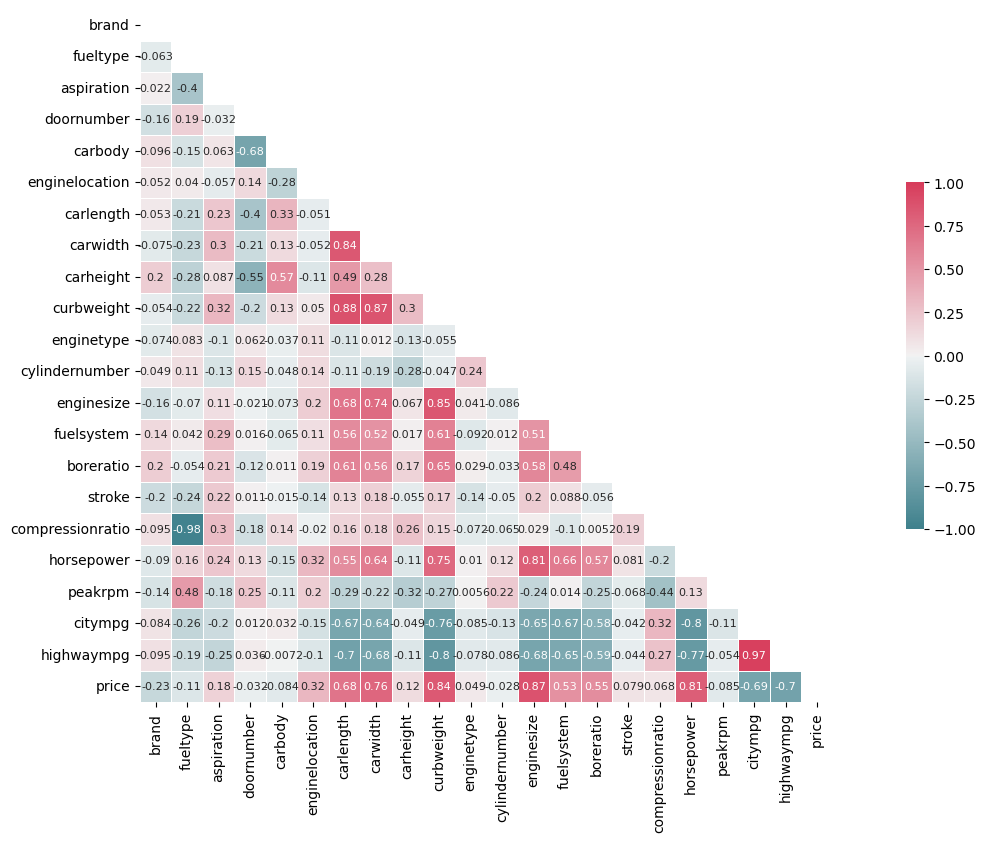

In [66]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool)) # np.triu devuelve un array con los valores del triángulo superior de otro array de 2 dimensiones

fig = plt.figure(figsize=(19, 9))

cmap = sns.diverging_palette(210, 5, as_cmap=True) # Para indicar los colores de nuestro heatmap

sns.heatmap(corr, mask = mask, cmap = cmap,
            vmax = 1, vmin = -1, center = 0,
            annot = True, annot_kws={"size": 8},
            square = True, linewidths = .5,
            cbar_kws = {"shrink": .5} # Comprimir la barra de la leyenda para ver mejor a que color corresponde cada valor
            )

plt.show()

 - Como era de esperar, se puede observar que existe una fuerte relación entre el tamaño del coche y el precio. Sin embargo, y como también se esperaba, el número de caballos tiene una gran influencia sobre el percio.
 - Por otra parte, se observa que el brand (marca de los coches) no tiene mucha correlación con el precio, lo cual a priori no parece tener mucho sentido.
 - En este gráfico, no haremos mucho caso a las variables de tipo string que han sido codificadas, ya que a veces pueden haber errores. 

# 3. Model

In [67]:
df.columns

Index(['brand', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'enginelocation', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [68]:
X = df[['brand', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'enginelocation', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg']]

In [69]:
y = df['price']

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    test_size = 0.3)

In [72]:
print(X_train.shape, X_test.shape)

(143, 21) (62, 21)


In [73]:
print(y_train.shape, y_test.shape)

(143,) (62,)


In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
linreg = LinearRegression()

In [76]:
linreg.fit(X_train, y_train)

LinearRegression()

In [77]:
y_pred = linreg.predict(X_test)
y_pred

array([25193.37614282, 19165.54317442,  9742.07664174, 14287.92256194,
       25813.92905075,  6536.56580775,  7816.58256806,  5788.63308154,
        9619.28233929,  6247.12183331, 13871.47539219,  5689.70592288,
       14815.92158483, 10704.06088083, 38404.81706377,  5935.24870192,
         142.28841955, 15350.73388518,  9622.9462509 , 10455.02866856,
       11602.382656  , 21256.8612519 ,  7895.76970555,  4214.77742066,
        6924.82597924, 24796.76517382, 13744.95130249, 15821.01817528,
        5007.25496105, 16462.74803892, 25845.97435863,  6756.62239871,
        5246.51080207, 21466.56551848,  8323.58326679, 26981.23443176,
       11490.75526114,  9338.96855335,  6496.72541444, 15670.98117879,
        7516.78462792, 12100.10178243, 18602.34951513,  5031.08904409,
        6473.73711875, 10705.72044017,  8227.36616831,  6517.20445715,
       18253.90005151, 15844.63648746,  6974.51576014, 19009.77975931,
        4174.86100824,  9167.2645049 ,  4962.0495448 , 14550.54120925,
      

# 4. INterpret

In [78]:
test = df.drop("price", axis = 1).sample(1)

test

,brand,fueltype,aspiration,doornumber,carbody,enginelocation,carlength,carwidth,carheight,curbweight,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
60,11,1,0,0,3,0,0.30476,0.276731,0.728239,-0.280253,...,-0.147475,-0.118132,1,0.222975,0.430217,-0.389299,-0.50997,-0.683286,0.119594,0.181783


In [79]:
linreg.predict(test.values)

f:\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11602.382656])

In [80]:
results = pd.DataFrame(np.c_[y_test, y_pred], columns = ["real", "pred"])

<Axes: >

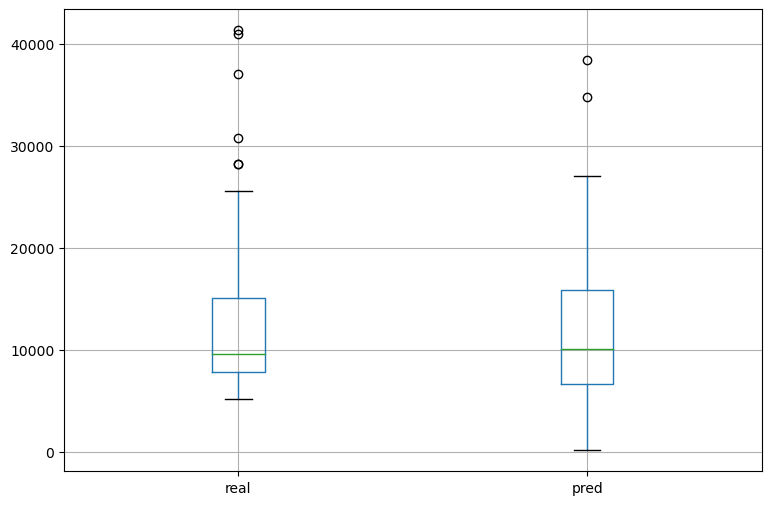

In [81]:
results.boxplot(figsize= (9 , 6))

- Obtenemos los residuales

In [82]:
results["residual"] = results["real"] - results["pred"]

In [83]:
results

,real,pred,residual
0,30760.000,25193.376143,5566.623857
1,17859.167,19165.543174,-1306.376174
2,9549.000,9742.076642,-193.076642
3,11850.000,14287.922562,-2437.922562
4,28248.000,25813.929051,2434.070949
...,...,...,...
57,11845.000,9338.968553,2506.031447
58,37028.000,34736.507422,2291.492578
59,5389.000,6245.832955,-856.832955
60,9233.000,9734.188974,-501.188974


In [84]:
results['residual'].mean()

330.18669679266605

In [85]:
results['residual'].var()

11070152.332684442

In [86]:
linreg.intercept_

7180.9540684198855

## Mean Squared Error (MSE)

In [123]:
from sklearn.metrics import mean_squared_error

linreg_mse = mean_squared_error(y_test, y_pred)
linreg_mse

11000624.74334774

In [88]:
results["residual"].apply(np.square).mean()

11000624.74334774

## Coeficiente r cuadrado

In [93]:
linreg_r2 = linreg.score(X_test, y_test)
linreg_r2

0.8412250356596664

In [98]:
linreg_coef = linreg.coef_
linreg_coef

array([ -147.07437696, 12224.35038759,  1618.44340238, -1220.767558  ,
       -1379.04166273, 10595.98102097,  -191.18031764,  1837.74888568,
         587.03137955,  1806.16049654,    61.95271977,    66.30020904,
        3467.8416003 ,   184.33968487,   -84.9804283 ,  -658.09201544,
        3725.50506389,   231.75159157,   681.61723578,  -331.48743486,
          30.94908163])

- Los cocientes son los valor de la pendiente de la recta de regresión generada. Tenemos cada uno de los cocientes por cada una de las variables independientes.
- En resumen, esto nos indica cuanto afecta cada una de nuestras variables independientes a nuestras predicciones, cuanto menor sea el coeficiente, menos afección sobre nuestra predicción tendrá.
- Un valor bajo indica que dicha variable, afecta poco a la predicción que se ha generado.

In [100]:
pd.Series(linreg_coef, index= df.drop("price", axis = 1).columns).sort_values(ascending=False)

fueltype            12224.350388
enginelocation      10595.981021
compressionratio     3725.505064
enginesize           3467.841600
carwidth             1837.748886
curbweight           1806.160497
aspiration           1618.443402
peakrpm               681.617236
carheight             587.031380
horsepower            231.751592
fuelsystem            184.339685
cylindernumber         66.300209
enginetype             61.952720
highwaympg             30.949082
boreratio             -84.980428
brand                -147.074377
carlength            -191.180318
citympg              -331.487435
stroke               -658.092015
doornumber          -1220.767558
carbody             -1379.041663
dtype: float64

- Por lo tanto, observamos que las variables `fueltyppe` y `enginelocation` son las que más han influido en nuestro modelo

# 5 Optimización 

In [107]:
index_feat_var = ['brand', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'enginelocation', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg']

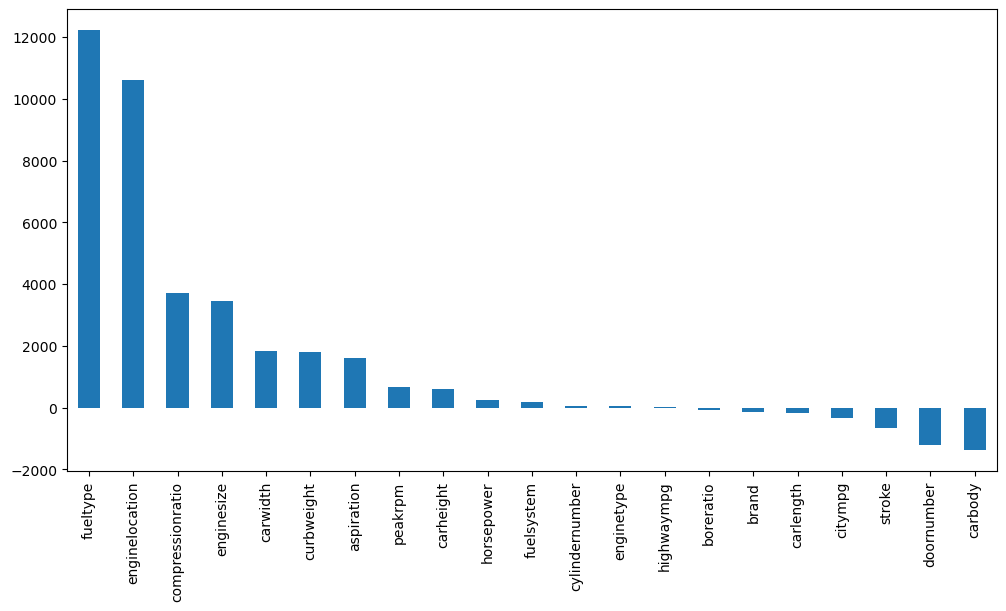

In [108]:
pd.Series(linreg_coef, index = index_feat_var).sort_values(ascending=False).plot.bar(figsize=(12, 6))

plt.show()

## 5.1 Lasso Regression

In [110]:
from sklearn.linear_model import Lasso

In [113]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [114]:
lasso_y_pred = lasso.predict(X_test)

In [115]:
lasso_r2 = lasso.score(X_test, y_test)
lasso_coef = lasso.coef_

lasso_r2, linreg_r2

(0.8414259768696656, 0.8412250356596664)

- Observamos que con Lasso obtenemos una score (coef r2) mayor, lo cual indica que nuestro modelo es más preciso

### 5.1.1 Cross validation para Lasso

In [116]:
from sklearn.linear_model import LassoCV

In [117]:
lasso_cv = LassoCV(n_alphas = 1000, random_state = 42).fit(X_train, y_train)
lasso_cv.alphas_

array([10500.22182014, 10427.86669605, 10356.010158  , 10284.64877033,
       10213.77912103, 10143.39782163, 10073.501507  , 10004.0868352 ,
        9935.15048731,  9866.68916728,  9798.6996018 ,  9731.17854009,
        9664.12275376,  9597.52903669,  9531.39420485,  9465.71509614,
        9400.48857026,  9335.71150854,  9271.38081379,  9207.4934102 ,
        9144.04624312,  9081.03627896,  9018.46050504,  8956.31592942,
        8894.5995808 ,  8833.30850835,  8772.43978156,  8711.99049012,
        8651.95774379,  8592.33867223,  8533.13042488,  8474.33017081,
        8415.93509864,  8357.94241631,  8300.34935104,  8243.15314914,
        8186.35107589,  8129.94041543,  8073.91847059,  8018.28256282,
        7963.030032  ,  7908.15823634,  7853.66455227,  7799.5463743 ,
        7745.80111488,  7692.42620429,  7639.41909053,  7586.77723918,
        7534.49813328,  7482.57927321,  7431.01817659,  7379.81237813,
        7328.95942955,  7278.45689941,  7228.30237305,  7178.49345243,
      

In [120]:
best_alpha_Lasso = lasso_cv.alpha_
best_alpha_Lasso

26.521670560855966

In [121]:
lasso_cv_y_pred = lasso_cv.predict(X_test)

In [124]:
lasso_cv_mse = mean_squared_error(y_test, lasso_cv_y_pred)

lasso_cv_mse, linreg_mse

(10152604.966103332, 11000624.74334774)

In [126]:
lasso_cv_r2 = lasso_cv.score(X_test, y_test)

lasso_cv_r2, linreg_r2

(0.8534647323162858, 0.8412250356596664)

## 5.2 Ridge Regression

- Voy a buscar directamente el mejor valor del hiperparámetro alpha

In [129]:
from sklearn.linear_model import RidgeCV

In [130]:
ridge_cv = RidgeCV(alphas = [0.1, 1.0, 10.0], cv = 5).fit(X_train, y_train)

In [132]:
ridge_cv_y_pred = ridge_cv.predict(X_test)

In [137]:
best_alpha_Ridge = ridge_cv.alpha_
best_alpha_Ridge

1.0

In [133]:
ridge_cv_mse = mean_squared_error(y_test, ridge_cv_y_pred)

ridge_cv_mse, linreg_mse

(10424127.38112475, 11000624.74334774)

In [134]:
ridge_cv_r2 = ridge_cv.score(X_test, y_test)

ridge_cv_r2, linreg_r2

(0.8495457765507328, 0.8412250356596664)

# 6. RESULTADOS

# 6.1 Puntuaciones de los modelos r2 y MSE

In [135]:
linreg_mse, linreg_r2

(11000624.74334774, 0.8412250356596664)

# 6.2 Valor del hiperparámetro óptimo en cada caso

- Lasso Rregression

In [136]:
best_alpha_Lasso

26.521670560855966

- Ridge Regression

In [138]:
best_alpha_Ridge

1.0

## 6.3 ¿Qué 2 features han influido más en los resultados?

In [139]:
lasso = Lasso(alpha = best_alpha_Lasso)
lasso.fit(X_train, y_train)

Lasso(alpha=26.521670560855966)

In [140]:
lasso_coef = lasso.coef_
lasso_coef

array([ -134.79182043,     0.        ,   256.58536257,  -920.0448041 ,
       -1268.19255327,  7596.12097124,     0.        ,  1719.08838787,
         553.48063594,  1507.31998633,    98.31105948,   109.60385472,
        3392.991644  ,   171.41834011,    -0.        ,  -760.10780245,
         465.82174168,   831.56352439,   780.70655179,    -0.        ,
          -0.        ])

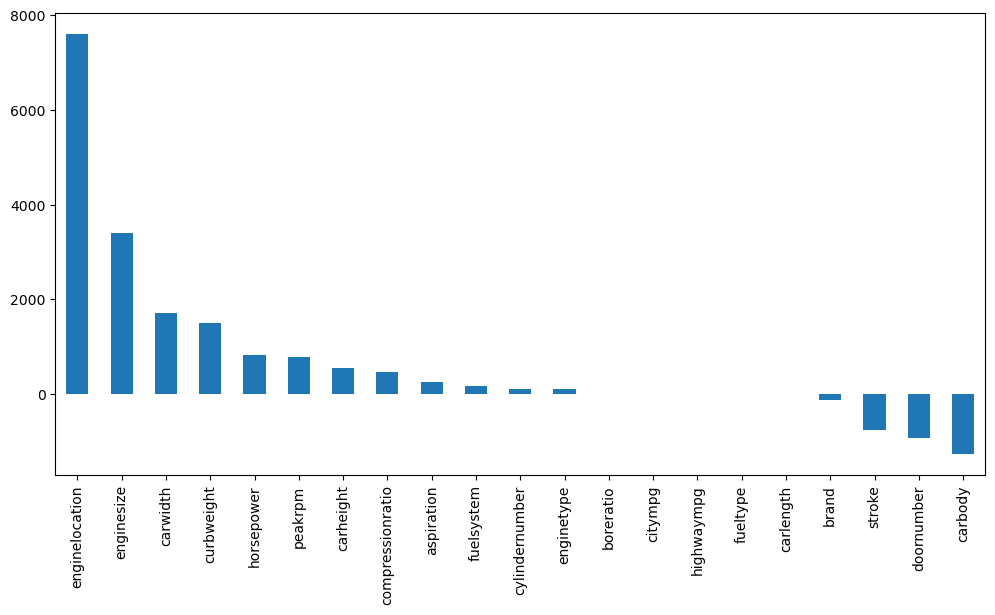

In [141]:
pd.Series(lasso_coef, index = index_feat_var).sort_values(ascending=False).plot.bar(figsize=(12, 6))

plt.show()

In [142]:
pd.Series(lasso_coef, index= df.drop("price", axis = 1).columns).sort_values(ascending=False)

enginelocation      7596.120971
enginesize          3392.991644
carwidth            1719.088388
curbweight          1507.319986
horsepower           831.563524
peakrpm              780.706552
carheight            553.480636
compressionratio     465.821742
aspiration           256.585363
fuelsystem           171.418340
cylindernumber       109.603855
enginetype            98.311059
boreratio             -0.000000
citympg               -0.000000
highwaympg            -0.000000
fueltype               0.000000
carlength              0.000000
brand               -134.791820
stroke              -760.107802
doornumber          -920.044804
carbody            -1268.192553
dtype: float64

- Por lo tanto, observamos que las variables `enginelocation` y `enginesize` son las que más han influido en nuestro modelo después de optimizarlo con Lasso y el mejor hiperparámetro alpha